<div style="border:solid green 3px; padding: 20px">

<b>Привет!</b>

Меня зовут Сороколетов Илья и я буду проверять твой проект. 

Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)


Для твоего удобства, я буду выделять свои комментарии следующим образом:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>


Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>

<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 

Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху

Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)

P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
    
    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение файла с данными и общей информации о данных. 

 Импорт библиотеки pandas. Загрузка данных из csv-файла в датафрейм  в переменную `data`. Путь к файлу:
        /datasets/real_estate_data.csv

In [1]:
import matplotlib.pyplot as plt#Импорт библиотеки matpotlib
import seaborn as sea#библиотека визуализации
import pandas as pd#библиотека пандас

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep = '\t')
pd.set_option('display.max_columns', 50)
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Все библиотеки лучше импортировать отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой

	pd.set_option('display.max_columns', 50)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо за подстказку 🙂
</div>

Основная информация о датафрейме:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных:**

- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — общая площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах (м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [4]:
data_len = len(data)#сохраним количество строк для оценки оставшихся данных посде предобработки

Визуальное представление данных:

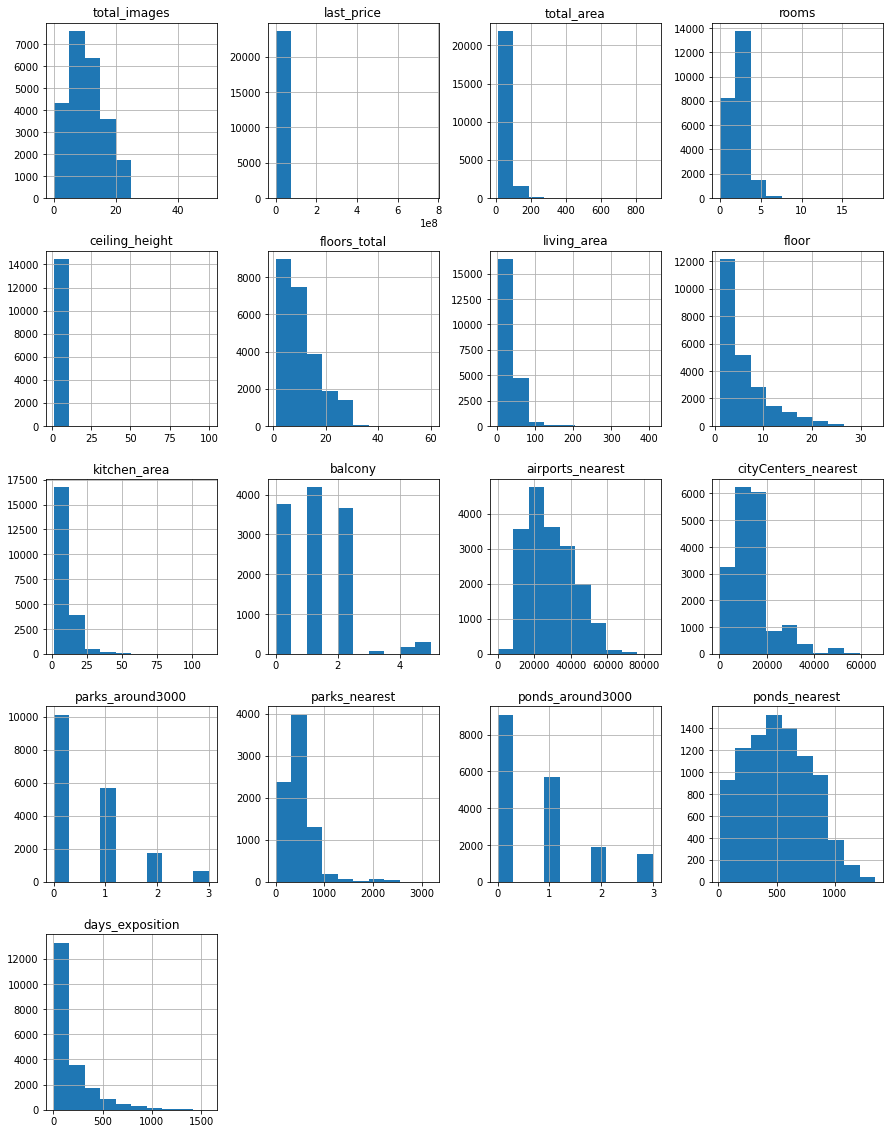

In [5]:
data.hist(figsize=(15, 20));

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Спасибо за подстказку, надеюсь правильно её поняла 🙂
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Так будет корректнее:
    
    data.hist(figsize=(15, 20));
</div>




### Предобработка данных

#### Обработка пропусков

Подсчет пропущенныхзначений:

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Анализ пропусков**
- ceiling_height — высота потолков (м) - пропуски заменим на медианное значение по группам этажности, вероятная причина возникновения пропусков - человеческий фактор, если поле не обызательное для заполнения, объяснимо и большое количество пропусков
- floors_total — всего этажей в доме - менее 1% данных, можно удалить, не подлежит восстановлению, вероятная причина возникновения - ошибка при сборке данных
- living_area — жилая площадь в квадратных метрах (м²) - 8% данных, важная для анализа информация, заменим на медианное значение по количеству комнат, вероятная причина - необязательное поле для заполнения/человечиский фактор
- is_apartment — апартаменты (булев тип) - явная ошибка при формировании выгрузки, скорее всего, пропуски соответствуют одному из булевых значенй нужно заменить, если бы была возножность уточнить у экспертов о возможных значениях, проверить была ли ошибка при выгрузке
- kitchen_area — площадь кухни в квадратных метрах (м²) - земеним расчетным значением,
- balcony — число балконов - вероятно пропуски означают осутствие балконов, а значит могут быть заменены 0
- locality_name — название населённого пункта - менее 1% данных, можно удалить, не поддежит восстановлению, вероятная причина возникновения - ошибка при сборке данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м), важные для анализа данны, но не восстановимы в рамках данного проекта, удаляем
- cityCenters_nearest — расстояние до центра города (м), важные для анализа данны, но не восстановимы в рамках данного проекта, удаляем
- parks_around3000 — число парков в радиусе 3 км - скорее всего пропуски соответствуют 0
- parks_nearest — расстояние до ближайшего парка (м) - пропуски там где нет парков
- ponds_around3000 — число водоёмов в радиусе 3 км - скорее всго пропуски соответствуют 0
- ponds_nearest — расстояние до ближайшего водоёма (м) - пропуски там где нет водоемов
- days_exposition — сколько дней было размещено объявление (от публикации до снятия) - требуется детальный анализ, возможно это объявления еще не снятые с публикации, тогда пропуски можно оставить.

Если бы была возможность уточнить выгрузку, а именно воссановить пропуски в геолокации, то сис. админу следовало бы передать следующию информацию:
    
    Основная причина пропусков в геолокации - это неправильно введенный населенный пункт, для того что бы избежать подобных причин в дальнейшем следует сделать данное поле выборным, а не заполняемым в ручную, что бы избежать человеческий фактор
    
    с.м. ниже список уникальных наименований насиленных пунктов и сравни его с тем что остался после удаления пропущенных значений

In [7]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Замена пропусков на фиксированные значения False и 0:

In [8]:
data['is_apartment'].unique()#проверка уникальных значений в столбце апортаменты

array([nan, False, True], dtype=object)

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

In [10]:
data['balcony'] = data['balcony'].fillna(0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

In [11]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [12]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Замена пропусков жилой площади на медианное значения по количеству комнат:

In [13]:
for t in data['rooms'].unique():
    data.loc[(data['rooms'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == t), 'living_area'].median()

Замена пропусков площади кухни на разность общей и жилой площадей, так же учтем коэффициент % площади кухни от нежилой площади:

In [14]:
kitchen_area = data['kitchen_area'].median() / (data['total_area'].median() - data['living_area'].median())
kitchen_area#коэффициент % площади кухни от нежилой площади

0.41935483870967744

In [15]:
data['kitchen_area'] = data['kitchen_area'].fillna((data['total_area']-data['living_area'])*kitchen_area)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Прекрасный способ для замены! 👏🏻👏🏻👏🏻
</div>

Замена пропусков высоты потолков на медианные значения по группам этажности:

In [16]:
data.groupby('floors_total')['ceiling_height'].median()

floors_total
1.0      2.80
2.0      2.70
3.0      2.80
4.0      3.00
5.0      2.55
6.0      3.00
7.0      3.00
8.0      2.80
9.0      2.55
10.0     2.60
11.0     2.75
12.0     2.65
13.0     2.70
14.0     2.60
15.0     2.70
16.0     2.70
17.0     2.70
18.0     2.70
19.0     2.75
20.0     2.75
21.0     2.70
22.0     2.75
23.0     2.75
24.0     2.75
25.0     2.75
26.0     2.66
27.0     2.70
28.0     2.60
29.0     2.60
33.0      NaN
34.0     2.65
35.0     2.70
36.0    14.85
37.0     1.75
52.0     2.65
60.0     2.88
Name: ceiling_height, dtype: float64

Группа с этажностью 33 оказалась пустая, земеним эти значения на медиану по столбцу:

In [17]:
for t in data['floors_total'].unique():
    if t != 33:
        data.loc[(data['floors_total'] == t) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[(data['floors_total'] == t), 'ceiling_height'].median()
    else:
        data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [18]:
data['ceiling_height'].isna().sum()

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

Удаление строк с пропущенными значениями, которые не подлежат восстановлению:

In [19]:
#data = data.dropna(subset=['floors_total','locality_name','airports_nearest','cityCenters_nearest'])

In [20]:
data = data.dropna(subset=['floors_total','locality_name'])

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br> Общую этажность и название населеного пункта точно удаляю, так как эти данные вообще никак не восстановить. Данные с пропущенной геолокацией из-за ошибки ввода наименования населеного пункта считаю что все таки нужно было удалять в рамках проекта, но в реальной ситуации нужно было бы сделать отдельный список и попытаться восстановить данные
</div>

Проверяем, что пропуски значений есть только у 0 значений в количестве парков поблизости:

In [21]:
data[data['parks_around3000'] != 0]['parks_nearest'].isna().sum()

0

Проверяем, что пропуски значений есть только у 0 значений в количестве водоемов поблизости:

In [22]:
data[data['ponds_around3000'] != 0]['ponds_nearest'].isna().sum()

0

Пропуски в столбце days_exposition пока оставляем, проверим нашу гипотезу после изменения формата данных

Проверка оставшихся пропусков:

In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>На данном этапе ты теряешь уже 5000 данных, а это много. Не забывай, что не всегда стоит делать замену, ради замены. Очень важно обоснование. Иногда пропуски можно удалить (если их мало, до 1%), либо вообще не трогать, если у нас нет возможности подобрать аргументированный способ замены. Поправь этот раздел так, чтобы мы не теряли такое количество данных
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена!
</div>

#### Обработка дубликатов

Поиск явных дубликатов:

In [24]:
data.duplicated().sum()

0

Как мы уже проверяли выще, столбец locality_name содержит множисто вариаций написания одного и того же населенного пункта, проверим что осталось после чистки пропущенных значений:

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

В случае, если бы оставили пропуски в геоданных, нам пришлось бы корректировать большое количество названий, но после зачистки пропусков, остался только один дубль, исправим это:

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>так как мы не удалили данные с пропусками в геолокации, мы получили список из большого числа некоректно введенных названий населеных пунктов, что бы это исправить нужно будет сначала удалить тип населеного пункта.
</div>

In [26]:
#data = data.replace('поселок Лисий Нос', 'посёлок Лисий Нос')

In [27]:
#Сначала удалим приписки с типом населенного пункта:
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('деревня ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('село ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('садовое товарищество ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('имени ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('станции ', '', regex=True)
data['locality_name'] = data['locality_name'].str.replace('Пансионат ', '', regex=True)



In [28]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Остается 305 уникальных наименований населенных пунктов, проверять их подленность вручную слишком трудозатратно, поэтому оставляем как есть.

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Было при удалении данных с пропусками геолокации: 
array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Парголово',
       'Ломоносов', 'Петергоф', 'Пушкин', 'Колпино', 'Кронштадт',
       'посёлок Металлострой', 'Павловск', 'Сестрорецк', 'Красное Село',
       'посёлок Понтонный', 'Зеленогорск', 'посёлок Молодёжное',
       'посёлок Стрельна', 'посёлок Александровская', 'посёлок Песочный',
       'посёлок Петро-Славянка', 'посёлок Репино', 'посёлок Сапёрный',
       'посёлок Лисий Нос', 'посёлок Левашово', 'посёлок Белоостров',
       'посёлок Усть-Ижора'], dtype=object)
</div>

In [29]:
data.duplicated().sum()

0

Но даже после замены повторяющихся названий, дубликатов не обнаружено.

Тут так же стоит учитывать что в данных отсутствует полный адрес, что существенно снижает возможность проверки дубликатов и фейков. Например, разные данные на квартиру с одним адресом.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Остались дубликаты с поселками городского типа, а также "поселок" и "посёлок"
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Жаль что не очень внимательно читаете, при удалении пропусков в геолокации нет необходимости в названиях убирать посёлок/поселок, так как остается лишь один дубликат. Сохраню списокв отдельном коментарии. Поскольку в реальной ситуации, скорее всего можно было бы удалить эти данные и работать без них или же составить отдельный список из объявлений с пропусками в геолокации и измененном названии населеного пункта, для уточнения выгрузки. К тому же 305 уникальных наименований включающие в себя, в том числе и мелкие СНТ и ЖД станции скорее всего имеют реально другие адреса, но не жителю СПБ и без эксперпа от туда проверить это не представляется возможным.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Так эти пропуски и не нужно удалять, потому что мы тогда теряем данные из других столбцов. Также важно помнить, что это учебный проект и необходимо, чтобы вы выполнили все задания с целью тренировки своих навыков)
</div>

#### Изменение типа данных

Цена за квартиру не может содержать копейки, а значит изменяем на целое:

In [30]:
data['last_price'] = data['last_price'].astype('int')

Меняем формат даты на удобный для дальнейшей работы:

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

В здание не может быть дробоное количество этажей, меняем формат на целое:

In [32]:
data['floors_total'] = data['floors_total'].astype('int')

Балконов, парков и водоёмов может быть только целое число:

In [33]:
data['balcony'] = data['balcony'].astype('int')

In [34]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [35]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Изменение типов данных проведено верно. Можно ещё заменить тип данных с float64 на float32 для экономии памяти.
</div>

#### Поиск и устранение анамальных значений

Проверка значений в стоимости квартир:

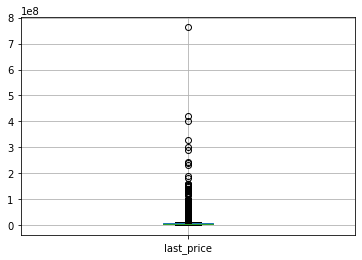

In [37]:
data.boxplot(column='last_price')
plt.show()

In [38]:
data.groupby('last_price')['last_price'].count()

last_price
12190        1
430000       2
440000       1
450000       4
470000       3
            ..
300000000    1
330000000    1
401300000    1
420000000    1
763000000    1
Name: last_price, Length: 2925, dtype: int64

In [39]:
data[data['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1,805.0,0,NaN,8.0


In [40]:
data[data['last_price'] > 250000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1436,19,330000000,190.0,2018-04-04,3,3.50,7,95.0,5,False,False,False,40.000000,0,Санкт-Петербург,23011.0,1197.0,3,519.0,3,285.0,233.0
12971,19,763000000,400.0,2017-09-30,7,2.60,10,250.0,10,False,False,False,62.903226,2,Санкт-Петербург,25108.0,3956.0,1,530.0,3,756.0,33.0
14706,15,401300000,401.0,2016-02-20,5,2.55,9,204.0,9,False,False,False,24.000000,3,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,393.0
15651,20,300000000,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.000000,0,Санкт-Петербург,32440.0,5297.0,0,NaN,2,198.0,111.0
19540,8,420000000,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.000000,0,Санкт-Петербург,30706.0,7877.0,0,NaN,2,318.0,106.0
22831,18,289238400,187.5,2019-03-19,2,3.37,6,63.7,6,False,False,False,30.200000,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN


По диаграме разброса и групировке по цене видим одно аномально малое значение и группу аномально больших значений.
Цены в 12190 за квартиру не может быть, поэтому даную строчку просто удаляем,~ а вот высокие цены хоть и являются выбросами, но в полне могут быть, стоит их оставить для дальнейшего анализа~ Цены более 250 мил. тоже удаляем как выбросы

In [41]:
data = data[data['last_price'] < 250000000]

In [42]:
data = data[data['last_price'] != 12190]

Анализ "количества комнат":

In [43]:
data.groupby('rooms')['rooms'].count()

rooms
0      194
1     8004
2     7895
3     5778
4     1172
5      324
6      104
7       57
8       12
9        8
10       3
11       2
14       2
15       1
16       1
19       1
Name: rooms, dtype: int64

In [44]:
data[data['rooms'] >= 10 ]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0,NaN,0,NaN,NaN
866,5,25000000,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0,NaN,2,435.0,418.0
4149,6,23000000,272.6,2018-01-11,10,3.14,7,145.9,7,False,False,False,18.8,1,Санкт-Петербург,10726.0,12169.0,1,191.0,1,531.0,NaN
5358,20,65000000,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1,767.0,0,NaN,14.0
9688,8,33000000,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1,686.0,2,66.0,813.0
14498,6,32250000,374.6,2018-06-09,19,2.55,5,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0,NaN,2,548.0,114.0
18119,4,15500000,216.1,2016-07-04,10,3.15,5,161.4,2,False,False,False,19.8,0,Санкт-Петербург,24353.0,4921.0,1,368.0,0,NaN,11.0
18848,6,28500000,270.0,2015-03-02,16,3.00,4,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1,516.0,0,NaN,1365.0
18891,11,40000000,290.0,2016-06-21,10,3.50,6,189.4,6,False,False,False,30.0,1,Санкт-Петербург,26229.0,4932.0,3,316.0,1,227.0,77.0
20829,6,28659000,245.4,2016-03-31,14,3.00,4,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3,541.0,2,118.0,95.0


В количестве комнат смущают 0 и значения более 10, нулей точно не может быть, даже если это свободная планировка указывается хотя бы 1, вероятно это ошибка при заполнении формы, удалим строчки с 0.
А вот значения > 10  выглядят адекватными с учетом площади квартиры и стоимости.

In [45]:
data = data[data['rooms'] != 0]

Колличество комнат более 10 больше похожи на выбрасы, тоже удаляем:

In [46]:
data = data[data['rooms'] < 10]

Проверяем столбец "всего этажей":

In [47]:
data.groupby('floors_total')['floors_total'].count()

floors_total
1       25
2      381
3      661
4     1186
5     5764
6      904
7      582
8      386
9     3745
10    1168
11     199
12    1354
13     229
14     545
15     361
16    1357
17     815
18     492
19     330
20     265
21     151
22     282
23     343
24     447
25    1046
26     122
27     162
28      21
29       1
33       1
34       1
35      22
36       3
37       1
52       1
60       1
Name: floors_total, dtype: int64

в интернете нет информации о 33,35,36,52 и 60 этажном здании в СПБ, хотя другие этажности есть, удаляем явные фейки:

In [48]:
data = data[(data['floors_total'] != 33 )
            &(data['floors_total'] != 35 )
            &(data['floors_total'] != 36 )
            &(data['floors_total'] != 52 )
            & (data['floors_total'] != 60)]

Проверяем столбец "этаж":

In [49]:
data.groupby('floor')['floor'].count()

floor
1     2891
2     3325
3     3045
4     2776
5     2599
6     1278
7     1193
8     1067
9     1032
10     675
11     511
12     512
13     365
14     329
15     335
16     308
17     217
18     172
19     140
20     107
21     117
22     106
23      94
24      59
25      43
26      22
27       8
Name: floor, dtype: int64

На первый взгляд, аномальных значений нет, убидимся что указанный этаж квартиры не выше этажности дома:

In [50]:
data.loc[(data['floor']-data['floors_total']) > 0 ]['floor'].count()

0

Проверяем количество балконов:

In [51]:
data.groupby('balcony')['balcony'].count()

balcony
0    15047
1     4152
2     3562
3       80
4      182
5      303
Name: balcony, dtype: int64

Хотя значения 4 и 5 и выглядят странными, но их довольно большое количество и как следствие на ошибку или выброс это мало похоже.

Дата публикации:

In [52]:
data.sort_values(by='first_day_exposition', ascending=False).head()#выводим на экран самые свежие обьявления

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15881,9,2100000,35.8,2019-05-03,1,2.50,5,18.0,5,False,False,False,7.0,1,Ленинское,NaN,NaN,0,NaN,0,NaN,NaN
21887,0,5600000,61.6,2019-05-03,3,2.50,9,42.0,5,False,False,False,8.3,0,Санкт-Петербург,36326.0,10641.0,1,637.0,0,NaN,NaN
12343,12,2890000,48.8,2019-05-03,2,2.55,5,29.4,1,False,False,False,7.2,0,Рощино,NaN,NaN,0,NaN,0,NaN,NaN
14424,1,14500000,91.4,2019-05-03,3,3.00,5,50.5,3,False,False,False,23.0,0,Санкт-Петербург,23783.0,3350.0,3,190.0,3,144.0,NaN
13993,6,3300000,43.0,2019-05-03,1,2.60,17,18.0,3,False,False,False,10.5,0,Колпино,28554.0,34341.0,0,NaN,3,287.0,NaN


Проверяем гипотезу, что пропуски в данных 'days_exposition' соответствуют неснятым объявлениям.

In [53]:
data.groupby('first_day_exposition')['days_exposition'].min().tail(20)

first_day_exposition
2019-04-14    4.0
2019-04-15    3.0
2019-04-16    4.0
2019-04-17    3.0
2019-04-18    3.0
2019-04-19    4.0
2019-04-20    NaN
2019-04-21    6.0
2019-04-22    3.0
2019-04-23    3.0
2019-04-24    3.0
2019-04-25    7.0
2019-04-26    4.0
2019-04-27    NaN
2019-04-28    NaN
2019-04-29    2.0
2019-04-30    2.0
2019-05-01    1.0
2019-05-02    NaN
2019-05-03    NaN
Name: days_exposition, dtype: float64

Гипотеза подтвердилась, пропуски соответствуют не снятым с публикации объявлениям на момент формирования выгрузки, оставим данные пропуски не заполненными.

Проверяем площади:

In [54]:
len(data[(data['kitchen_area'] + data['living_area']) >= data['total_area']])

170

Так как суммарная площадь кухни и жилой площади не может привышать общей площади, удаляем данные не осоответствующие этому правилу:

In [55]:
data = data[(data['kitchen_area'] + data['living_area']) < data['total_area']]

Проверяем высоту потолков:

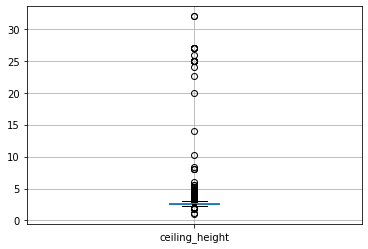

In [56]:
data.boxplot(column='ceiling_height')
plt.show() 

In [57]:
data['ceiling_height'].min()

1.0

Высота потолков в квартире не может быть ниже 2,4 метра по современным стандартам, возьмем минимальную высоту 2 метра, остальные объявления отбросим:

In [58]:
data = data[data['ceiling_height'] > 2.0]

Высота потолка более 10 метров ныглядит странной, отбросим эти значения:

In [59]:
data = data[data['ceiling_height'] < 10.0]

Рассмотрим общюю площадь:

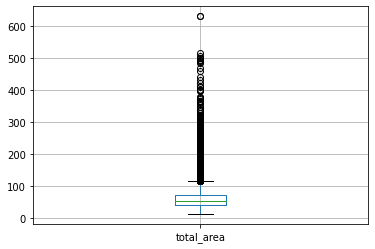

In [60]:
data.boxplot(column='total_area')
plt.show() 

Квартиры большой площади это нормально, но так как они встречаются редко отбросим значения больше 400:

In [61]:
data = data[data['total_area'] <= 400]

Остальные столбцы, судя по визуализации в начале, не имеют каких-то подозрительных значений

In [62]:
len(data)/data_len

0.9748512595468163

~В ходе зачистки пропусков и аномальных значений мы потеряли 25% даных, однако, оставшиеся данные наиболее полные и коректные, а их объем достаточен для качественного анализа - Это если бы удалили пропуски геоданных!~

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>При сохранении пропусков в геоданых у нас теряется только 2,5% от первоначальных данных, что допустимо.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>В итоге ты отбросила почти 25% от всех данных, а доступимо отбросить не более 10%. Основные столбцы где стоит поработать с выбросами это стоимость квартиры, высота потолков, количество комнат и общая площадь. Остальные можно не трогать. Если ты всё-таки хочешь обработать все столбцы, то уменьши количество отбрасываемых данных до quantile(0.005) и quantile(0.995). Вне зависимости от того способа, который ты выберешь не забудь проверить количество отбрасываемых данных. 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Правка не выполнена. Обрати внимание на максимальные значения в таблице ниже в столбце last_price, total_area, rooms и ceiling_height. Нужно посмотреть на графики и отбросить те значения, которые встречаются крайне редко
</div>

In [63]:
#код ревьюера
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23103.000000,2.310300e+04,23103.000000,23103.000000,23103.000000,23103.000000,23103.000000,23103.000000,23103.000000,23103.000000,17737.000000,17758.000000,23103.000000,7914.000000,23103.000000,8862.000000,19988.000000
mean,9.894213,6.391192e+06,60.101105,2.079643,2.707811,10.599533,34.133495,5.842185,10.534487,0.588279,28854.895078,14211.579345,0.471108,490.559136,0.587889,519.973257,181.723384
std,5.674646,7.785624e+06,32.260770,1.032111,0.243189,6.501503,20.341617,4.823231,6.180775,0.957763,12637.291288,8636.969514,0.749237,342.096990,0.880519,277.355366,220.269382
min,0.000000,4.300000e+05,12.000000,1.000000,2.250000,1.000000,2.000000,1.000000,0.167742,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.200000,1.000000,2.550000,5.000000,18.500000,2.000000,7.000000,0.000000,18574.000000,9249.750000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.400000,4.000000,9.000000,0.000000,26815.000000,13094.000000,0.000000,454.000000,0.000000,504.000000,96.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.750000,16.000000,42.700000,8.000000,12.000000,1.000000,37347.000000,16285.000000,1.000000,612.000000,1.000000,733.000000,232.000000
max,50.000000,2.450000e+08,400.000000,9.000000,8.300000,34.000000,260.000000,27.000000,128.832097,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Пики в указанных столбцах подчищены, хотя на мой взгляд, при анализе квартир нормально было бы оставить пиковые значения по цене и площади, так как такие варианты имеют место быть и они не массовые, и следует их учитывать для анализа
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Правка выполнена. Такие значения могут влиять на результат и от них лучше избавляться. Аномальная площадь, это не значит, что такой площади быть не может, это значит что она сильно отличается от всей основной массы данных
</div>

### Подсчёт и добавление в таблицу новых столбцов

Год публикации объявления:

In [64]:
data['year'] = data['first_day_exposition'].dt.year

Месяц публикации объявления:

In [65]:
data['month'] = data['first_day_exposition'].dt.month

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [66]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Цена одного квадратного метра:

In [67]:
data['price_one_sq.meter'] = data['last_price'] / data['total_area']

Тип этажа квартиры (значения — «первый», «последний», «другой»):

In [68]:
#создадим функцию которая определит тип этажа:
def categorize_floors(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif (row['floors_total'] - row['floor']) == 0:
            return 'последний'
        else:
            return 'другой'
    except:
        pass

In [69]:
data['categorize_floors'] = data.apply(categorize_floors, axis=1)

Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений):

In [70]:
data['citycenters_nearest_km'] = data['cityCenters_nearest']//1000

In [71]:
#data['citycenters_nearest_km'] = data['citycenters_nearest_km'].astype('int')#изменим формат на целое

In [72]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,weekday,price_one_sq.meter,categorize_floors,citycenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,2019,3,3,120370.370370,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.75,11,18.60,1,False,False,False,11.000000,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,2018,12,1,82920.792079,первый,18.0
2,10,5196000,56.00,2015-08-20,2,2.55,5,34.30,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,2015,8,3,92785.714286,другой,13.0
3,0,64900000,159.00,2015-07-24,3,2.60,14,45.00,9,False,False,False,47.806452,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,2015,7,4,408176.100629,другой,6.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,2018,6,1,100000.000000,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.100000,0,Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,2018,9,0,95065.789474,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.66,26,10.60,6,False,False,False,14.400000,1,Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,2017,11,3,99195.710456,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.75,24,30.50,22,False,False,False,18.900000,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,2019,4,3,110544.692737,другой,11.0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.810000,0,Мурино,NaN,NaN,0,NaN,0,NaN,189.0,2018,5,2,87454.764777,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.500000,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,2017,2,6,88524.590164,другой,15.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>По заданию необходимо построить гистограммы для каждого из перечисленных столбцов и после этого написать выводы по каждому графики. Здорово, что ты используешь метод describe и его лучше оставить под каждым графиком)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
# <br>Просьба уточнить чем плох подход представленный в работе - разбитие графиков по логическим группам и вывод по группе сразу, вместо того что бы снова сравнивать оотдельные величины - ведь просмотр значений по столбцу есть при зачистке анамальных значений, а в данной части мы уже смотрим влияние значений между собой.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Причин несколько:
<br>- выполняя однотипные задания ты лучше усваиваешь материал и набиваешь руку, чтобы в дальнейшем ты могла это делать на автомате
<br>- посмотри на размер графика, который я прикрепил ниже. Разве его комфортно изучать?
<br>- из-за размера графика у тебя накладываются надписи одна на другую, что дополнительно затрудняет его изучение стороннему человеку
<br>- делая графики по отдельности ты можешь добавить к нему подпись сверху, подписать оси, а также подобрать индивидуальные параметры
<br>- выполняя задание всегда думай о том, что твой проект может посмотреть коллега или заказчик. Лучше прививать аккуратность с самого начала.
    
<br>Я не против твоего подхода, но тогда сделай так, чтобы графики выглядели опрятно    
</div>

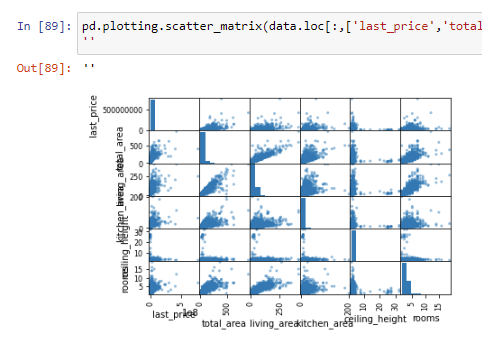

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br>Графики увеличены до читабельных размеров, там где используются диаграммы рассеивания добавлены таблички корреляции для большей наглядности.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v3:</b>
<br>Отличная работа! Так гораздо лучше)
</div>

#### Изучение пораметров 

Расмотрим данные с точки зрения подачи объявления:

Проверим какой период захватывают полученные данные:

In [73]:
pd.pivot_table(data, index = 'year',columns = 'month',values = 'weekday',aggfunc = 'count')

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,114.0
2015,67.0,60.0,106.0,49.0,65.0,93.0,92.0,90.0,89.0,142.0,152.0,150.0
2016,116.0,255.0,344.0,409.0,425.0,451.0,138.0,88.0,118.0,121.0,132.0,121.0
2017,285.0,427.0,215.0,629.0,538.0,660.0,574.0,721.0,968.0,909.0,1195.0,859.0
2018,579.0,1296.0,997.0,299.0,148.0,519.0,844.0,801.0,757.0,892.0,817.0,356.0
2019,413.0,548.0,860.0,930.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Зависимость размещения объявлений от дня недели:

In [74]:
year_month_weekday = pd.pivot_table(data, index = ['year','month'],columns = 'weekday',values = 'first_day_exposition',aggfunc = 'count')
year_month_weekday

weekday         0      1      2      3      4      5     6
year month                                                
2014 11       NaN    NaN    NaN   18.0    NaN    1.0   NaN
     12      17.0   34.0   27.0   19.0    7.0    4.0   6.0
2015 1        7.0   10.0   28.0    9.0    9.0    3.0   1.0
     2        9.0    7.0   12.0   22.0    5.0    4.0   1.0
     3        8.0   42.0   23.0   15.0    6.0    4.0   8.0
     4        8.0   11.0    7.0    7.0   13.0    2.0   1.0
     5        7.0    9.0   21.0    8.0   13.0    4.0   3.0
     6        7.0   28.0   19.0   21.0   12.0    2.0   4.0
     7        8.0   10.0   26.0   25.0   13.0    7.0   3.0
     8       17.0   13.0   12.0   13.0   16.0    8.0  11.0
     9       12.0   12.0    8.0   25.0    8.0    6.0  18.0
     10       9.0   27.0   35.0   28.0   22.0   18.0   3.0
     11      32.0   28.0   30.0   20.0   27.0    7.0   8.0
     12      20.0   35.0   23.0   39.0   20.0   10.0   3.0
2016 1       21.0   16.0   17.0    9.0   24.0   16.0  13.0
     2       46.0   40.0   29.0   46.0   43.0   28.0  23.0
     3       54.0   63.0   64.0   56.0   55.0   32.0  20.0
     4       82.0   62.0   75.0   57.0   74.0   35.0  24.0
     5       55.0   82.0   73.0  102.0   61.0   23.0  29.0
     6       52.0   85.0   90.0   92.0   68.0   30.0  34.0
     7       41.0   22.0   10.0   17.0   28.0   15.0   5.0
     8       14.0   14.0   18.0    8.0   22.0    5.0   7.0
     9        8.0   11.0   32.0   35.0   15.0    9.0   8.0
     10      33.0   14.0   23.0   16.0   14.0   13.0   8.0
     11      19.0   21.0   20.0   26.0   33.0    9.0   4.0
     12      24.0   13.0   20.0   27.0   17.0    9.0  11.0
2017 1       69.0   45.0   51.0   40.0   37.0   19.0  24.0
     2       63.0   89.0   58.0   64.0   91.0   23.0  39.0
     3       29.0   55.0   30.0   35.0   38.0   19.0   9.0
     4       95.0  101.0   50.0  122.0  146.0   60.0  55.0
     5       87.0   81.0  116.0   97.0  101.0   31.0  25.0
     6       75.0   92.0   97.0  160.0  152.0   50.0  34.0
     7      104.0   94.0   95.0   84.0   89.0   67.0  41.0
     8      117.0  154.0  146.0  131.0   87.0   46.0  40.0
     9      128.0  170.0  222.0  136.0  160.0   81.0  71.0
     10     126.0  183.0  127.0  138.0  207.0   59.0  69.0
     11     125.0  174.0  215.0  214.0  317.0   83.0  67.0
     12     115.0  147.0  132.0  128.0  159.0  107.0  71.0
2018 1      130.0   64.0   79.0   76.0  127.0   60.0  43.0
     2      143.0  192.0  172.0  505.0  149.0   72.0  63.0
     3      159.0  164.0  135.0  162.0  173.0  119.0  85.0
     4       44.0   49.0   56.0   57.0   54.0   11.0  28.0
     5       18.0   31.0   25.0   26.0   25.0   13.0  10.0
     6       66.0   75.0   66.0   91.0  107.0   71.0  43.0
     7      154.0  213.0  130.0  113.0   82.0   72.0  80.0
     8      110.0  142.0  168.0  129.0  139.0   69.0  44.0
     9      107.0  154.0  126.0  108.0  122.0   82.0  58.0
     10     192.0  165.0  170.0  123.0  129.0   56.0  57.0
     11     116.0  132.0  141.0  150.0  127.0   63.0  88.0
     12      64.0   69.0   54.0   47.0   50.0   33.0  39.0
2019 1       48.0   92.0   82.0   72.0   50.0   36.0  33.0
     2       86.0  116.0   92.0  115.0   55.0   45.0  39.0
     3      137.0  156.0  137.0  135.0  152.0   67.0  76.0
     4      215.0  173.0  133.0  164.0  126.0   65.0  54.0
     5        NaN    NaN   30.0   11.0   20.0    NaN   NaN

In [75]:
data_year = pd.pivot_table(data, index = 'year', values = 'price_one_sq.meter', aggfunc = ['count','median'])
data_year.columns = ['count','median']
data_year

,count,median
year,,
2014,133,107000.000000
2015,1155,93333.333333
2016,2718,91602.051652
2017,7980,92307.692308
2018,8305,95588.235294
2019,2812,103125.000000


<AxesSubplot:xlabel='year'>

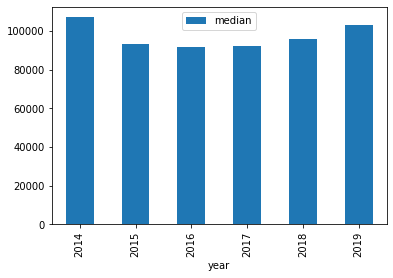

In [76]:
data_year.plot( y = 'median', kind = 'bar')

*Вывод:*
    Даные захватывают период с 11.2014 по 5.2019. При этом наблюдается рост числа объявлений от месяца к месяцу и от года к году.
    В неделю поступление объявлений не равномерно, пик приходится на вторник и среду, при этом понедельник и выходные дни, хоть и есть поступление новых объявлений, но их существенно меньше чем в остальные дни.    
    Так же, если исключить данные за 2014 год, видна тенденция к общему росту стоимости за 1 кв.метр

Расмотрим растояния до центра, аэропорта, парков и водоемов:

In [77]:
data_distances = data.loc[:,['price_one_sq.meter','airports_nearest', 'parks_nearest', 'ponds_nearest','citycenters_nearest_km']]
data_distances.head()

,price_one_sq.meter,airports_nearest,parks_nearest,ponds_nearest,citycenters_nearest_km
0,120370.370370,18863.0,482.0,755.0,16.0
1,82920.792079,12817.0,NaN,NaN,18.0
2,92785.714286,21741.0,90.0,574.0,13.0
3,408176.100629,28098.0,84.0,234.0,6.0
4,100000.000000,31856.0,112.0,48.0,8.0


In [78]:
data_distances.corr()

,price_one_sq.meter,airports_nearest,parks_nearest,ponds_nearest,citycenters_nearest_km
price_one_sq.meter,1.000000,-0.040627,0.009897,-0.118375,-0.344449
airports_nearest,-0.040627,1.000000,-0.071300,0.009043,0.272290
parks_nearest,0.009897,-0.071300,1.000000,0.000474,-0.040662
ponds_nearest,-0.118375,0.009043,0.000474,1.000000,0.033834
citycenters_nearest_km,-0.344449,0.272290,-0.040662,0.033834,1.000000


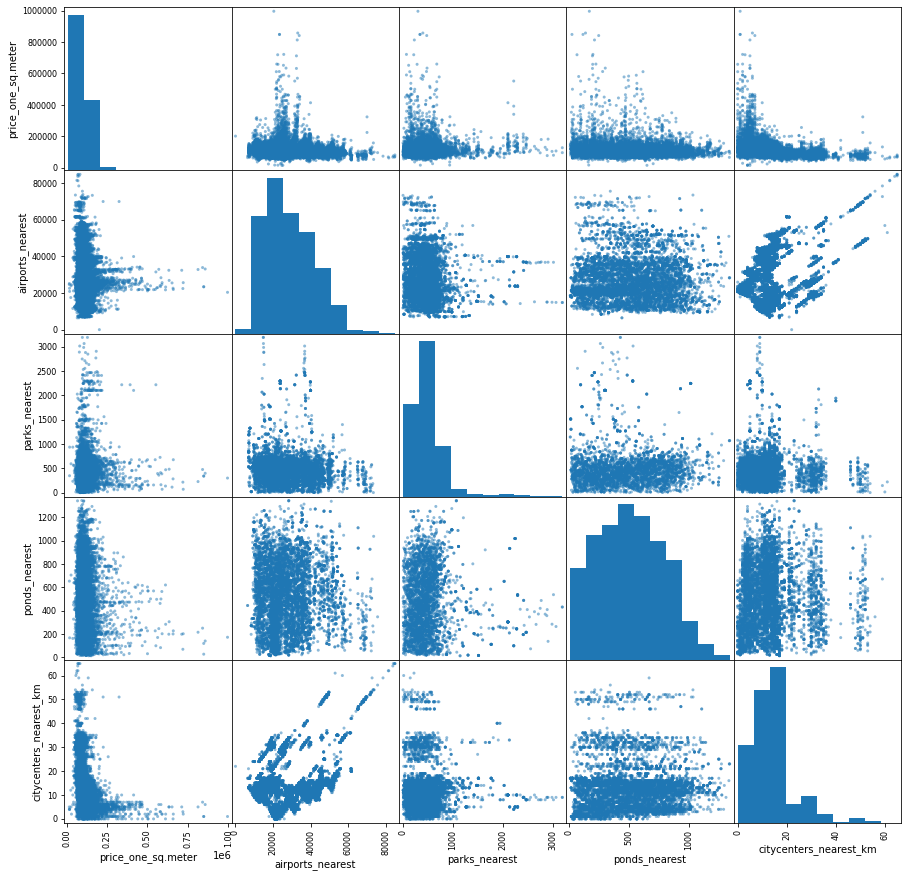

In [79]:
pd.plotting.scatter_matrix(data_distances,figsize = (15,15));

*Вывод:* Прослеживаются следующие закономерности:

- чем ближе к центу, тем дальше от аэропорта и тем дороже цена за 1 кв.метр
- не сильное влияние на цену в зависимости от близости расположения парков и водоемов
- растояние до парков и водоемов ни как не связаны с дальностью расположения от центра и аэропорта и между собой

Изучение этажности:

In [80]:
data.loc[:,['price_one_sq.meter', 'floors_total', 'floor','categorize_floors']].corr()

,price_one_sq.meter,floors_total,floor
price_one_sq.meter,1.000000,0.164980,0.137233
floors_total,0.164980,1.000000,0.678691
floor,0.137233,0.678691,1.000000


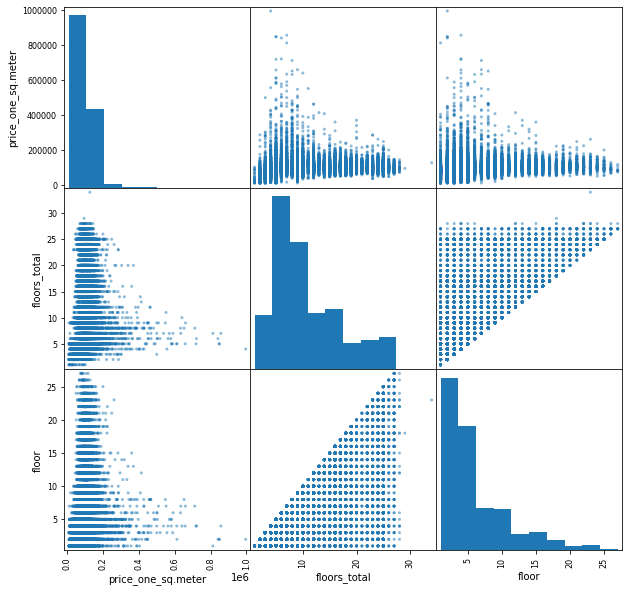

In [81]:
pd.plotting.scatter_matrix(data.loc[:,['price_one_sq.meter', 'floors_total', 'floor','categorize_floors']],figsize = (10,10));

In [82]:
data.groupby('categorize_floors')['price_one_sq.meter'].median()

categorize_floors
другой       98153.828675
первый       81221.570444
последний    87551.957996
Name: price_one_sq.meter, dtype: float64

*Вывод:*
    Квартиры на первом этаже дешевле чем квартиры на последнем этаже, в свою очередь последний этаж так же не является популярным и стоимость за квартиры на последних этажах ниже чем стоимость за другой этаж. ПРи этом общая этажность дома на стоимость квартиры не имеет влияния

Изучение стоимости и площадей квартиры, а так же количества комнат и высоты потолков:

<AxesSubplot:>

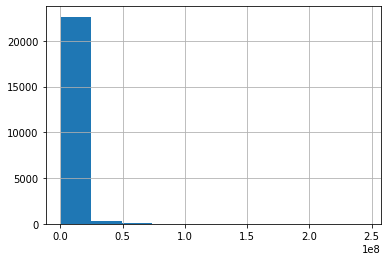

In [83]:
data['last_price'].hist()

In [84]:
data['last_price'].describe()#данные по цене

count    2.310300e+04
mean     6.391192e+06
std      7.785624e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      2.450000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

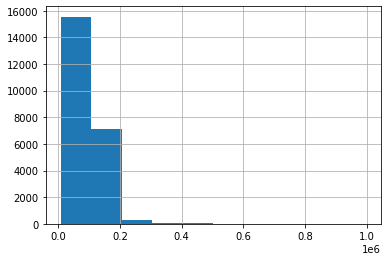

In [85]:
data['price_one_sq.meter'].hist()

In [86]:
data['price_one_sq.meter'].describe()#данные по цене за 1кв.м

count     23103.000000
mean      98970.174871
std       46157.271575
min        7962.962963
25%       76504.310345
50%       94827.586207
75%      113989.354172
max      995983.935743
Name: price_one_sq.meter, dtype: float64

<AxesSubplot:>

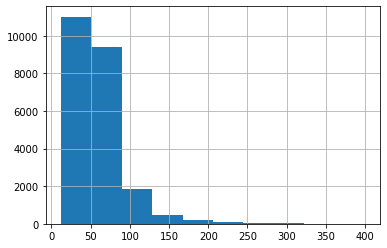

In [87]:
data['total_area'].hist()

In [88]:
data['total_area'].describe()#данные по общей площади

count    23103.000000
mean        60.101105
std         32.260770
min         12.000000
25%         40.200000
50%         52.000000
75%         70.000000
max        400.000000
Name: total_area, dtype: float64

<AxesSubplot:>

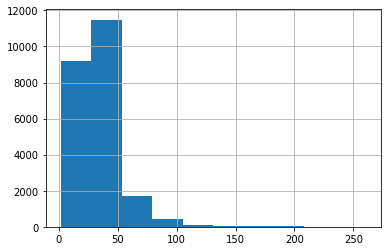

In [89]:
data['living_area'].hist()

In [90]:
data['living_area'].describe()#данные по жилой площади

count    23103.000000
mean        34.133495
std         20.341617
min          2.000000
25%         18.500000
50%         30.400000
75%         42.700000
max        260.000000
Name: living_area, dtype: float64

<AxesSubplot:>

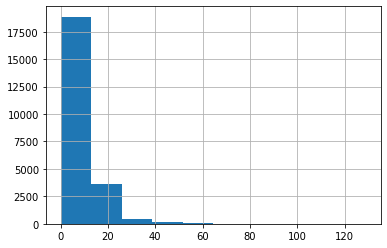

In [91]:
data['kitchen_area'].hist(bins =10)

In [92]:
data['kitchen_area'].describe()#данные по площади кухни

count    23103.000000
mean        10.534487
std          6.180775
min          0.167742
25%          7.000000
50%          9.000000
75%         12.000000
max        128.832097
Name: kitchen_area, dtype: float64

<AxesSubplot:>

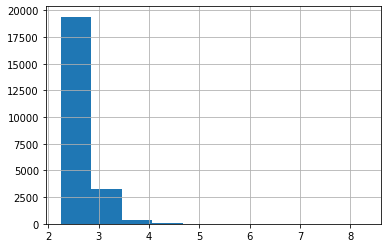

In [93]:
data['ceiling_height'].hist(bins = 10)

In [94]:
data['ceiling_height'].describe()#высота потолков

count    23103.000000
mean         2.707811
std          0.243189
min          2.250000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

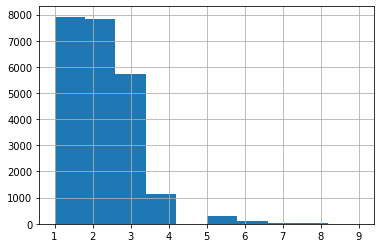

In [95]:
data['rooms'].hist()

In [96]:
data['rooms'].describe()#высота потолков

count    23103.000000
mean         2.079643
std          1.032111
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

In [97]:
data.loc[:,['last_price','total_area','living_area','kitchen_area','ceiling_height','rooms']].corr()

,last_price,total_area,living_area,kitchen_area,ceiling_height,rooms
last_price,1.000000,0.719528,0.623098,0.576693,0.367380,0.428404
total_area,0.719528,1.000000,0.919102,0.639165,0.398173,0.781730
living_area,0.623098,0.919102,1.000000,0.398497,0.354260,0.868845
kitchen_area,0.576693,0.639165,0.398497,1.000000,0.335205,0.276302
ceiling_height,0.367380,0.398173,0.354260,0.335205,1.000000,0.224145
rooms,0.428404,0.781730,0.868845,0.276302,0.224145,1.000000


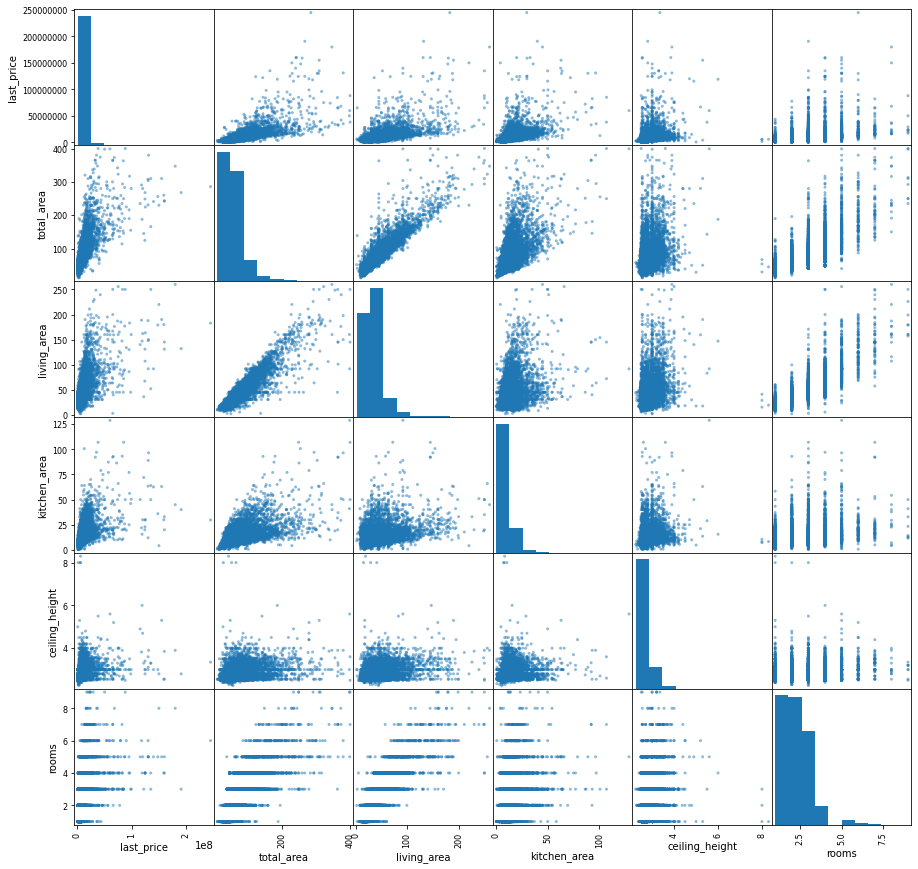

In [98]:
pd.plotting.scatter_matrix(data.loc[:,['last_price','total_area','living_area','kitchen_area','ceiling_height','rooms']],figsize = (15,15));

*Вывод:* Прямая зависимость площадей логична (чем выше общая площадь, тем выше площадь кухни и жилая площадь). То же касается площади и количества комнат (чем больше комнат, тем больше площадь квартиры). Высота потолков никак не связана ни с каким из параметров. Цена выше если больще плащадь.

#### Изучения продолжительности объявлений

In [99]:
data['days_exposition'].describe()

count    19988.000000
mean       181.723384
std        220.269382
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [100]:
dataf = pd.pivot_table(data, index = 'days_exposition',values = 'year', aggfunc = 'count')
dataf

,year
days_exposition,
1.0,1
2.0,3
3.0,152
4.0,170
5.0,145
...,...
1512.0,2
1513.0,1
1553.0,1


In [101]:
#dataf.plot(y = 'year', kind = 'bar', ylim=(0, 150), figsize=(15, 15),label='Количество объявлений закрытых за х дней')

<AxesSubplot:>

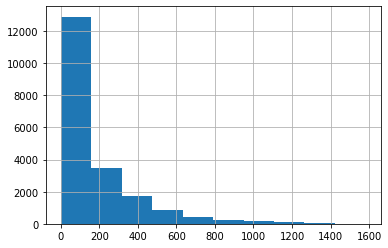

In [102]:
data['days_exposition'].hist()

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Здесь лучше построить обычную гистограмму, так график будет более "чистым" без наслоения внизу
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>График изменен
</div>

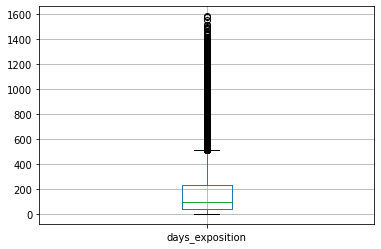

In [103]:
data.boxplot(column='days_exposition')
plt.show()


In [104]:
data[data['days_exposition'] > 600].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,month,weekday,price_one_sq.meter,categorize_floors,citycenters_nearest_km
23,11,2950000,32.0,2016-10-29,1,2.60,9,17.7,9,False,False,False,6.1,0,Санкт-Петербург,15414.0,14211.0,2,517.0,1,190.0,615.0,2016,10,5,92187.500000,последний,14.0
35,6,15500000,149.0,2017-06-26,5,2.55,5,104.0,4,False,False,False,17.0,0,Санкт-Петербург,23670.0,3502.0,0,NaN,1,779.0,644.0,2017,6,0,104026.845638,другой,3.0
42,13,22000000,161.8,2015-07-08,4,2.80,4,80.9,2,False,False,False,17.6,5,Петергоф,35416.0,30605.0,2,47.0,1,907.0,987.0,2015,7,2,135970.333745,другой,30.0
43,13,9330000,48.0,2017-01-10,2,3.00,4,28.0,4,False,False,False,7.5,0,Санкт-Петербург,15016.0,10822.0,0,NaN,1,492.0,763.0,2017,1,1,194375.000000,последний,10.0
61,18,7990000,74.0,2017-08-24,2,3.00,4,43.0,4,False,False,False,20.0,0,Санкт-Петербург,22568.0,4288.0,1,363.0,0,NaN,609.0,2017,8,3,107972.972973,последний,4.0


**Вывод:**
Всего имеется ~15510~ 19988 закрытых объявления, из них минимальное время объявления до снятия составляет 1 день, а максимальное ~1572~ 1580 дней, 50% объявлений закрывается за менее чем 96 дней (3 месяца), медианное значение при этом составляет 181 день. Быстрыми можно считать продажи за 45 дня, при этом объявления снятые через 1-2 и даже 3 дня, могут быть сняты по иным причинам нежели продажа квартиры, аномально долгие продажи, более 600 дней, на первый взгляд не имеют каких-то объединяющих признаков.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

#### Анализ стоимости квартир в зависимости от населеного пункта. ТОП10 по количеству объявлений

In [105]:
datag = pd.pivot_table(data, index = 'locality_name',values = 'price_one_sq.meter', aggfunc = ['count','max','min','median', 'mean'])
datag.columns = ['count','max','min','median', 'mean']
datag = datag.sort_values(by='count', ascending=False).head(10)
datag

,count,max,min,median,mean
locality_name,,,,,
Санкт-Петербург,15363,995983.935743,15345.268542,104591.836735,114243.200079
Мурино,551,138580.246914,50000.000000,84876.543210,85363.176491
Кудрово,445,160401.002506,54160.346696,95081.967213,94999.660410
Шушары,433,126666.666667,47700.416089,76666.666667,78208.858679
Всеволожск,383,640422.350472,31400.000000,65789.473684,68651.448494
Пушкин,368,256521.739130,59836.065574,100000.000000,103180.403394
Колпино,337,125000.000000,47957.371226,74725.274725,75480.547446
Парголово,322,138522.427441,39205.955335,91780.224134,90248.786836
Гатчина,302,146315.789474,10507.246377,67671.510409,68636.425344


<AxesSubplot:xlabel='locality_name'>

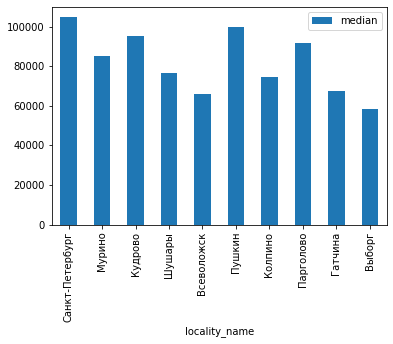

In [106]:
datag.plot(y = 'median', kind = 'bar')

**Вывод:**
Большенство квартир продается непосрредственно в Санкт-Петербурге 15363, что в 35 раз больше чем в других населенных пунктах, там же находятся квартира с самым дорогим и самым дешевым квадратным метром, как собственно и выше средние и медианое значение. Самой низкой средней стоимостью за квадратный метр может похвастаться Красное Село.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После того как ты отбросишь меньшее количество данных, результат может изменится
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
    
<b>Вывод:</b>
    После того как мы оставили даные с пропуском геолокации, данные по распределению объявления по населенным пунктам изменились. СПБ по прежнему занимает лидирующиее место по количеству объявлений, максимальной цене и максимальной медианной цене. Но вот самые дешевые квартиры находятся в Выборге.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

#### Анализ стоимости квартиры в Санкт-Петербурге в зависимости от её удалености от центра

In [107]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']# выделяем только объявления из СПБ
#создадис сводную таблицу со счтоимостью 1кв.м
data_spb_fin = pd.pivot_table(data_spb,index = 'citycenters_nearest_km',values = 'price_one_sq.meter',aggfunc = ['min', 'max','median'])
data_spb_fin.columns = ['min', 'max','median']
data_spb_fin

,min,max,median
citycenters_nearest_km,,,
0.0,68000.000000,658436.213992,138536.993745
1.0,57961.165049,995983.935743,123847.877854
2.0,28919.631094,721518.987342,116119.402985
3.0,62179.487179,719298.245614,110027.855153
4.0,15861.571738,552000.000000,125714.285714
5.0,15345.268542,813253.012048,125098.425197
6.0,37234.042553,857542.877144,133858.267717
7.0,41911.764706,841379.310345,125000.000000
8.0,64983.333333,313253.012048,113728.582555


<AxesSubplot:xlabel='citycenters_nearest_km'>

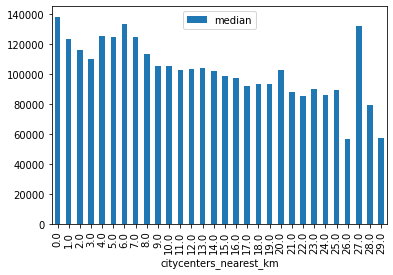

In [108]:
data_spb_fin.plot(y='median', kind='bar')

**Вывод:**
    По графику медианых значений в группах по удаленности от центра города наблюдается тенденция к снижению стоимости при отдолении от центра, но при этом есть несколько райнов, по видимому с более развитой инфраструкторой или популярных, где цена сопоставима с ценой квартиру в центре города. К таким районам можно отнести область с 4 ло 7 км от центра и 27 км от центра.
    Так как снижение цены не равноменрно определить точно какая стоимость прибавляетмя к 1 кв.м за 1 км к центру не возможно, эта сумма имеет не линейную зависимость, но можно условно отметить ее в пределах от 10 до 20 тысяц.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Верно 👍
</div>

#### Изучение факторов влияющих на полную стоимость квартиры

Изучим влияние следующих параметров:
- общей площади;
- жилой площади;
- площади кухни;
- количество комнат;
- типа этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год);

Таблица корреляции:

In [109]:
data.loc[:,['last_price','total_area','living_area','kitchen_area','rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.719528,0.623098,0.576693,0.428404
total_area,0.719528,1.000000,0.919102,0.639165,0.781730
living_area,0.623098,0.919102,1.000000,0.398497,0.868845
kitchen_area,0.576693,0.639165,0.398497,1.000000,0.276302
rooms,0.428404,0.781730,0.868845,0.276302,1.000000


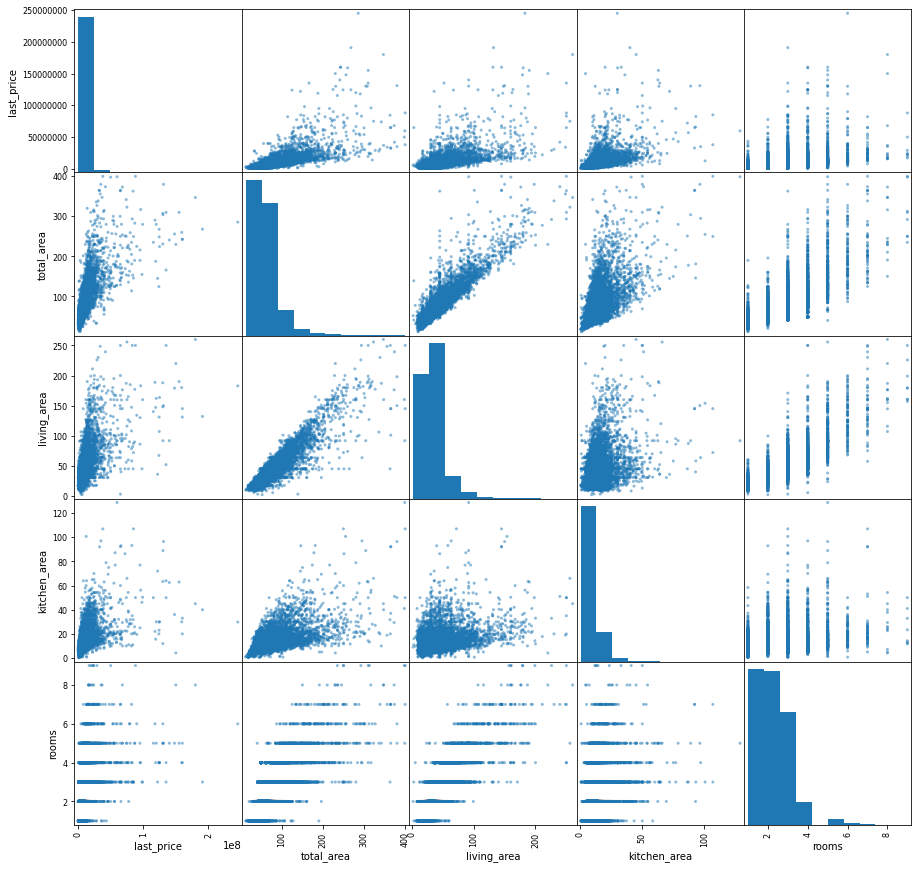

In [110]:
pd.plotting.scatter_matrix(data.loc[:,['last_price','total_area','living_area','kitchen_area','rooms']],figsize = (15,15));

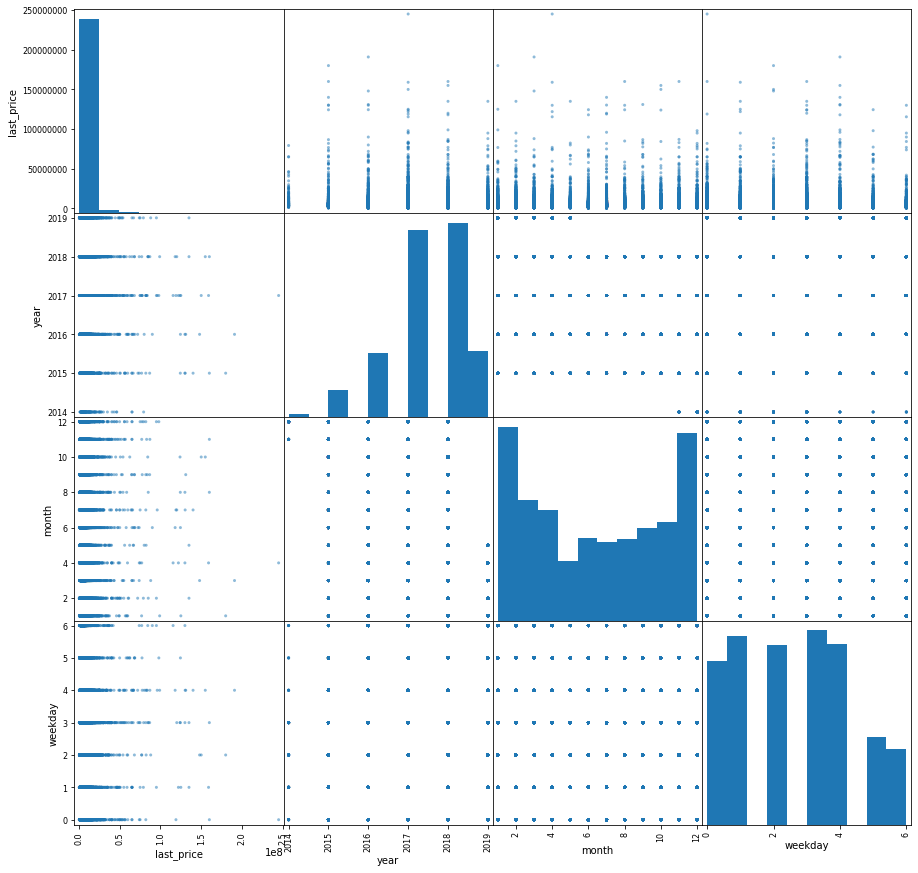

In [111]:
pd.plotting.scatter_matrix(data.loc[:,['last_price','year','month','weekday','categorize_floors']],figsize = (15,15));

In [112]:
data.groupby('categorize_floors')['last_price'].median()

categorize_floors
другой       4855000
первый       3900000
последний    4300000
Name: last_price, dtype: int64

<AxesSubplot:xlabel='categorize_floors'>

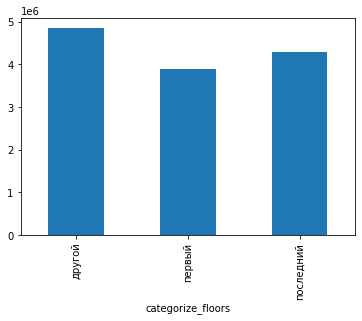

In [113]:
data.groupby('categorize_floors')['last_price'].median().plot(kind = 'bar')

**Вывод:**
~Цена за 1 кв.метра растет при:~
Цена за квартиру растет при:
- увеличении числа комнат
- уменьшении растояния до центра
- увеличении общей площади (в том числе и жилой площади и площади кухни)

Цена так же имеет незначительные колебания, в том числе с тенденцией на рост в зависимости от даты публикации. Но не имеет линейной зависимсоти от этажности квартиры (цены за первый этаж ниже чем за последний, последний так же ниже по цене чем иные этажи)

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>По заданию нас просили изучить общую стоимость квартиры, а не стоимость за квадратный метр. Давай ещё добавим расчет корреляции для общей площади, жилой площади, площади кухни и количества комнат. А также у тебя нет графика по категории этажей
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>    
<br>Кореляция по площади была и есть, выделена в отдельный график, так как если свести все параметры в один график взаимозависимостей, график просто будет не читаем. Пареметры были разбиты на две логические, не имееющие на друг друга прямого влияния, группы и проанализированны в них. Так же из-за прямой зависимости общей цены и цены за 1кв. м в принципе все выводы идентичны для обоих этих величин.
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v2:</b> 
<br>Под расчетом корреляции я имею ввиду метод .corr(). Ты можешь просто выбрать 4 столбца, добавить к ним столбец с общей ценой и применить к ним этот метод. В итоге получится компактная табличка
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>    
<br>Стыдно что забыла метод corr(), добавила его. 🙂
</div>


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v3:</b> 
<br>Эээээх, а я уже собирался принимать проект, но увы, пока не могу. Остаётся совсем маленькая правка)    
    
<br>Рассчитывать корреляцию Пирсона для дня, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану. Графики у тебя уже есть, поэтому остаётся только удалить расчет корреляции)
    
</div>

### Общий вывод

В ходе изучения данных по объявлениям о проаже квартир в СПБ и области можно прийти к следующим выводам:

- для избежания ошибок в определении геолокации требуется введение в форму выборного поля "Населенный пункт"
- для выделения фейков и дубликатов требуются данные с полным адресом квартиры, чтобы исключить по одному адресу квартиры с разными параметрами
- итоговая цена зависит от количества комнат, общей площади и расположения квартиры относительно центра (за исключением некоторых районов) в большей степени, чем от расположения парков, водоемов, высоты потолков
- со временем цена за 1 кв.м растет
- в будние дни выставляется больше объявлений чем в выходные
- в среднем на продажу квартиры уходит от 3 месяцев

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудилась, большая часть работы сделана, но остаётся внести следующие правки:
<br>- корректно произвести заполнение/удаление пропусков
<br>- удалить дубликаты "поселок городского типа ..." и "посёлок" / "поселок"
<br>- поправить границы для аномальных значений 
<br>- построить гистограммы для каждого из перечисленных столбцов
<br>- изучить общую стоимость, а не цену за квадратный метр, а также доработать этот раздел
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Все правки согласно замечаний внесены с коментариями по указанному шаблону.
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v2:</b> 
<br>Остались 4 правки:
<br>- поправить границы для аномальных значений 
<br>- построить гистограммы для каждого из перечисленных столбцов
<br>- добавить расчет корреляции
<br>- поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента v2:</b>
<br>Выполнены правки:
    - удалены аномально большие значения в цене, общей площади, высоте потолков, комнатах
    - изменен размер гистограм для удобного чтения
    - добавлен расчет методом corr, там где были использованы гистограммы рассеивания, для большей наглядности
    - внесенные изменения на выводы не повлияли
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v3:</b> 
<br>- удалить расчет корреляции
</div>

<div class="alert alert-info">
<b>Комментарий студента v3:</b>
<br>Расчет корреляции для года, месяца и дня удален
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод